<a href="https://colab.research.google.com/github/Ibraheem101/Churn-Prediction/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
!wget $data -O churn.csv

--2023-02-26 23:27:20--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘churn.csv’

churn.csv           100%[===================>] 954.59K  --.-KB/s    in 0.01s   

2023-02-26 23:27:20 (92.2 MB/s) - ‘churn.csv’ saved [977501/977501]



In [4]:
df = pd.read_csv('churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
len(df)

7043

In [6]:
# Convert all strings to lowercase and replace all spaces with underscores
df.columns = df.columns.str.lower()

categorical_cols = df.select_dtypes(include = 'object').columns.tolist()
for column in categorical_cols:
  df[column] = df[column].str.lower().str.replace(' ', '_')

In [7]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [9]:
# Convert to 0 or 1. 1 for yes
df['churn'] = df['churn'].replace({'yes' : 1, 'no' : 0})

In [10]:
# df['totalcharges'].astype('float')

In [11]:
df['totalcharges'] = df['totalcharges'].replace('_', '')

In [12]:
df['totalcharges'] = df['totalcharges'].replace('', '0')

In [13]:
df['totalcharges'] = df['totalcharges'].astype('float')

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
monthlycharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
totalcharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
churn,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00


###Preparing the Dev set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [17]:
df_train, df_val = train_test_split(df_train_full, test_size=0.2, random_state=1)

In [18]:
len(df_train), len(df_val), len(df_test)

(4507, 1127, 1409)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

### EDA

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
monthlycharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
totalcharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
churn,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00


In [22]:
df_train_full['churn'].value_counts(normalize = True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [23]:
print(f"The Churn rate = {df_train_full['churn'].mean()}")

The Churn rate = 0.26996805111821087


In [24]:
global_churn = df_train_full['churn'].mean()

<AxesSubplot:xlabel='churn', ylabel='count'>

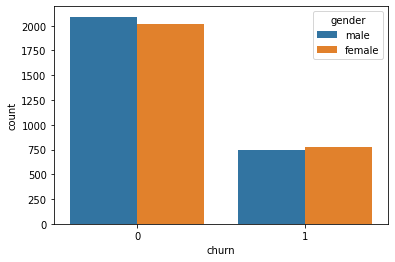

In [25]:
sns.countplot(data = df_train_full, x = 'churn', hue = 'gender')

<AxesSubplot:xlabel='churn', ylabel='count'>

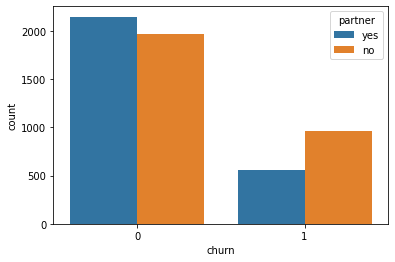

In [26]:
sns.countplot(data = df_train_full, x = 'churn', hue = 'partner')

In [27]:
df_train_full.nunique()

customerid          5634
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1494
totalcharges        5291
churn                  2
dtype: int64

In [28]:
df.tenure

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

### Feature Importance

In [29]:
categorical_columns = df_train_full.select_dtypes(include = 'object').columns.tolist()[1:]
categorical_columns.append('seniorcitizen')

In [30]:
categorical_columns

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'seniorcitizen']

In [31]:
df_train_full

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [32]:
churn_female = df_train_full[df_train_full['gender'] == 'female'].churn.mean()
churn_female

0.27682403433476394

In [33]:
churn_male = df_train_full[df_train_full['gender'] == 'male'].churn.mean()
churn_male

0.2632135306553911

In [34]:
churn_partner = df_train_full[df_train_full['partner'] == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [35]:
churn_no_partner = df_train_full[df_train_full['partner'] == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [36]:
global_churn - churn_male, global_churn - churn_female

(0.006754520462819769, -0.006855983216553063)

In [37]:
global_churn - churn_partner, global_churn - churn_no_partner

(0.06493474245795922, -0.05984095297455855)

Churn rate based on gender is very small but it's significant based on partner. Partner might be a more important feature than gender

**Risk Ratio**\
Instead of subtracting froup churn from global churn, we divide group churn by global churn.\
If value > 1; more likely to churn

In [38]:
churn_male/global_churn, churn_female/global_churn, churn_no_partner/global_churn, churn_partner/global_churn

(0.9749802969838747,
 1.0253955354648652,
 1.2216593879412643,
 0.7594724924338315)

In [39]:
# We want to implement this in Python
"""
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;


"""

'\nSELECT\n    gender,\n    AVG(churn),\n    AVG(churn) - global_churn AS diff,\n    AVG(churn) / global_churn AS risk\nFROM\n    data\nGROUP BY\n    gender;\n\n\n'

In [40]:
from IPython.display import display

In [41]:
for column in categorical_columns:
  print(column)
  df_group = df_train_full.groupby(column)['churn'].agg(['mean', 'count'])
  df_group['risk'] = df_group['mean'] / global_churn
  df_group['difference'] = df_group['mean'] - global_churn
  display(df_group)
  print('...')
  print('...')

gender


,mean,count,risk,difference
gender,,,,
female,0.276824,2796,1.025396,0.006856
male,0.263214,2838,0.974980,-0.006755


...
...
partner


,mean,count,risk,difference
partner,,,,
no,0.329809,2932,1.221659,0.059841
yes,0.205033,2702,0.759472,-0.064935


...
...
dependents


,mean,count,risk,difference
dependents,,,,
no,0.313760,3968,1.162212,0.043792
yes,0.165666,1666,0.613651,-0.104302


...
...
phoneservice


,mean,count,risk,difference
phoneservice,,,,
no,0.241316,547,0.893870,-0.028652
yes,0.273049,5087,1.011412,0.003081


...
...
multiplelines


,mean,count,risk,difference
multiplelines,,,,
no,0.257407,2700,0.953474,-0.012561
no_phone_service,0.241316,547,0.893870,-0.028652
yes,0.290742,2387,1.076948,0.020773


...
...
internetservice


,mean,count,risk,difference
internetservice,,,,
dsl,0.192347,1934,0.712482,-0.077621
fiber_optic,0.425171,2479,1.574895,0.155203
no,0.077805,1221,0.288201,-0.192163


...
...
onlinesecurity


,mean,count,risk,difference
onlinesecurity,,,,
no,0.420921,2801,1.559152,0.150953
no_internet_service,0.077805,1221,0.288201,-0.192163
yes,0.153226,1612,0.567570,-0.116742


...
...
onlinebackup


,mean,count,risk,difference
onlinebackup,,,,
no,0.404323,2498,1.497672,0.134355
no_internet_service,0.077805,1221,0.288201,-0.192163
yes,0.217232,1915,0.804660,-0.052736


...
...
deviceprotection


,mean,count,risk,difference
deviceprotection,,,,
no,0.395875,2473,1.466379,0.125907
no_internet_service,0.077805,1221,0.288201,-0.192163
yes,0.230412,1940,0.853480,-0.039556


...
...
techsupport


,mean,count,risk,difference
techsupport,,,,
no,0.418914,2781,1.551717,0.148946
no_internet_service,0.077805,1221,0.288201,-0.192163
yes,0.159926,1632,0.592390,-0.110042


...
...
streamingtv


,mean,count,risk,difference
streamingtv,,,,
no,0.342832,2246,1.269897,0.072864
no_internet_service,0.077805,1221,0.288201,-0.192163
yes,0.302723,2167,1.121328,0.032755


...
...
streamingmovies


,mean,count,risk,difference
streamingmovies,,,,
no,0.338906,2213,1.255358,0.068938
no_internet_service,0.077805,1221,0.288201,-0.192163
yes,0.307273,2200,1.138182,0.037305


...
...
contract


,mean,count,risk,difference
contract,,,,
month-to-month,0.431701,3104,1.599082,0.161733
one_year,0.120573,1186,0.446621,-0.149395
two_year,0.028274,1344,0.104730,-0.241694


...
...
paperlessbilling


,mean,count,risk,difference
paperlessbilling,,,,
no,0.172071,2313,0.637375,-0.097897
yes,0.338151,3321,1.252560,0.068183


...
...
paymentmethod


,mean,count,risk,difference
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,0.622928,-0.101797
credit_card_(automatic),0.164339,1217,0.608733,-0.105630
electronic_check,0.455890,1893,1.688682,0.185922
mailed_check,0.193870,1305,0.718121,-0.076098


...
...
seniorcitizen


,mean,count,risk,difference
seniorcitizen,,,,
0,0.242270,4722,0.897403,-0.027698
1,0.413377,912,1.531208,0.143409


...
...


**Mutual Information Score**

In [42]:
from sklearn.metrics import mutual_info_score

In [43]:
def churn_mutual_information_score(column):
  return mutual_info_score(column, df_train_full.churn)

In [44]:
mutual_info = pd.DataFrame(df_train_full[categorical_columns].apply(churn_mutual_information_score).sort_values(ascending = False), columns = ['score'])
mutual_info

,score
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


<AxesSubplot:xlabel='score'>

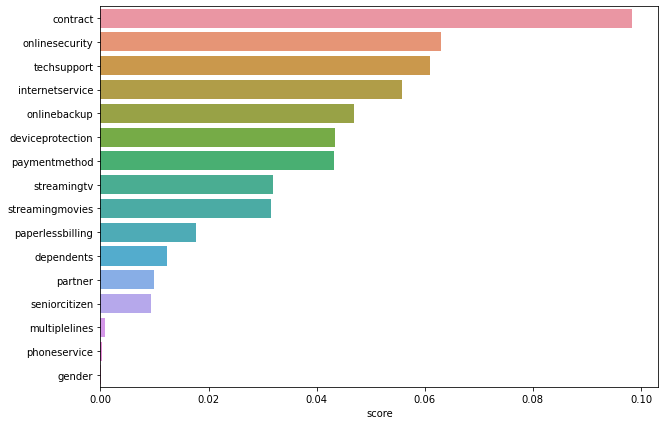

In [45]:
plt.figure(figsize = (10,7))
sns.barplot(x = mutual_info.score, y = mutual_info.index)

**Correlation**

In [46]:
numerical_cols = df_train_full.select_dtypes(include = ['int64', 'float64']).columns.tolist()[1:-1]

In [47]:
correlation_info = pd.DataFrame(df_train_full[numerical_cols].corrwith(df_train_full.churn), columns = ['score'])
correlation_info

,score
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


<AxesSubplot:xlabel='score'>

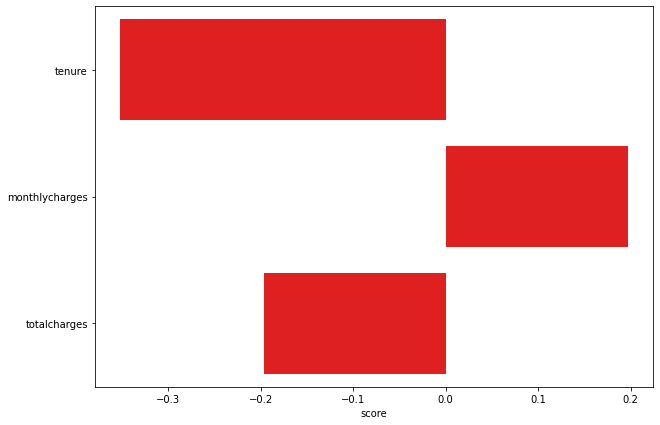

In [48]:
plt.figure(figsize = (10,7))
sns.barplot(y = correlation_info.index, x = correlation_info.score, color = 'r')

In [49]:
from sklearn.feature_extraction import DictVectorizer

### One-Hot Encoding

In [50]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns + numerical_cols].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_columns + numerical_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [51]:
X_train[0]

array([  0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,   1.  ,  19.7 ,   1.  ,   0.  ,
         0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  ,
         0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         0.  ,   1.  ,   0.  ,  30.  , 625.05])

### Modelling
#### Logistic Regression

In [52]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [53]:
sigmoid(-9)

0.00012339457598623172

In [54]:
z = np.linspace(-5, 5, 100)

In [55]:
sigmoid(z)

array([0.00669285, 0.00739896, 0.00817894, 0.00904041, 0.00999169,
       0.01104196, 0.01220126, 0.01348063, 0.01489212, 0.01644893,
       0.01816549, 0.02005754, 0.0221422 , 0.02443814, 0.02696557,
       0.02974643, 0.03280439, 0.036165  , 0.0398557 , 0.04390588,
       0.04834692, 0.05321217, 0.0585369 , 0.06435824, 0.07071501,
       0.07764755, 0.0851974 , 0.093407  , 0.1023192 , 0.11197671,
       0.12242144, 0.13369374, 0.14583148, 0.1588691 , 0.17283646,
       0.18775769, 0.20364993, 0.22052213, 0.23837374, 0.25719365,
       0.2769591 , 0.29763488, 0.31917283, 0.34151151, 0.36457644,
       0.38828059, 0.41252537, 0.43720205, 0.46219351, 0.48737642,
       0.51262358, 0.53780649, 0.56279795, 0.58747463, 0.61171941,
       0.63542356, 0.65848849, 0.68082717, 0.70236512, 0.7230409 ,
       0.74280635, 0.76162626, 0.77947787, 0.79635007, 0.81224231,
       0.82716354, 0.8411309 , 0.85416852, 0.86630626, 0.87757856,
       0.88802329, 0.8976808 , 0.906593  , 0.9148026 , 0.92235

<AxesSubplot:>

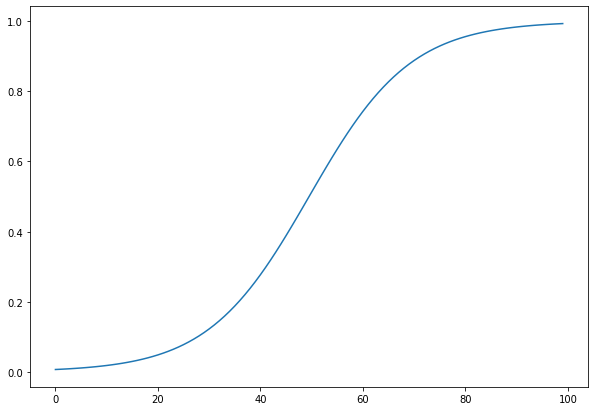

In [56]:
plt.figure(figsize = (10,7))
sns.lineplot(data = sigmoid(z))

In [57]:
from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression(solver='lbfgs', max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [70]:
model.coef_[0]

array([ 5.84333983e-01, -1.73673487e-01, -5.25722827e-01, -2.48744684e-02,
       -9.01878626e-02,  6.65819530e-02, -1.04079527e-01, -7.75647569e-02,
       -4.53898636e-02, -6.96724673e-02, -3.54078609e-01,  3.43095805e-01,
       -1.04079527e-01,  1.77072703e-03, -2.42647514e-01,  1.53938811e-01,
       -2.63536278e-02,  5.79581512e-02, -1.04079527e-01, -6.89409552e-02,
        2.42981634e-01, -1.04079527e-01, -2.53964438e-01, -2.21947403e-01,
        1.06885073e-01, -1.05324843e-01, -9.73748805e-03, -1.16264649e-01,
       -3.31008607e-02,  8.47214583e-02, -5.04182799e-02,  1.53938811e-01,
       -2.69001142e-01,  1.94636212e-01, -9.55026832e-02, -1.04079527e-01,
        8.45198792e-02, -5.05400431e-02, -1.04079527e-01,  3.95572391e-02,
        2.15403341e-01, -1.04079527e-01, -2.26386145e-01, -7.02975325e-02,
        4.26036300e-04])

In [68]:
model.intercept_[0]

-0.11713849433836902

In [76]:
model.predict_proba(X_val)[:, 1] #Prob of occurrence of 1

array([0.0080245 , 0.20828809, 0.21911337, ..., 0.03195847, 0.58816177,
       0.29324629])